# MAT281 - Tarea 1

## SVD y Gatitos 

En este ejercicio utilizaremos la descomposición valor singular con tal de comprimir imágenes, si bien hay algoritmos mucho mejores para esto, será un ejercicio muy ilustrativo. 

### Recuerdo

La descomposición SVD de una matriz $A$ de tamaño $m \times n$ posee la siguiente forma 
$$
A = U \Sigma V^H
$$
donde $\Sigma$ es diagonal $m \times n$, mientras que $U$ y $V$ son matrices unitarias $m \times m$ and $n \times n$, respectivamente. Los elementos diagonales de $\Sigma$ son no-negativos y aquellos valores positivos son llamados **valores singulares** de $A$. Como convención los valores singulares se listan en orden decreciente a lo largo de la diagonal. Las columnas de $U$ y $V$ son llamadas **vectores singulares** izquierdos y derechos respectivamente.

PD: Recuerda que $A^H = \overline{A}^\top$, es decir, la matriz traspuesta de la matriz conjugada.

In [16]:
import numpy as np
from scipy.linalg import svd

np.random.seed(42)  # Para reproducibilidad de resultados

Por ejemplo para una matriz de $2 \times 2$:

In [17]:
A = np.array([[0.1, 0.5], [0.4, 0.8]])
u, s, vh = svd(A)

#### Ejercicio 1

(5 puntos)

Define la función `svd_validaton` tal que:

1. El _input_ sea un arreglo bidimensional `A` de tamaño $m \times n$.
2. Obtenga la descomposición valor singular de `A`.
3. Retorne `True` o `False` si es que se cumple la igualdad 
$$
A = \sum_{l=1}^{\min(m, n)} \sigma_l \; u_l v_l^H,
$$
donde $\sigma_l$ corresponden a los valores singulares de $A$, mientras que $u_i$ y $v_j$ a las columnas de $U$ y $V$ respectivamente. Hint: Utiliza `np.allclose` con la tolerancia por defecto.

In [18]:
def svd_validation(A):
    
    #Se realiza la descomposición svd
    u, s, vh = svd(A)
    
    #Se guarda la dimensión de la matriz y se toma el mínimo
    row, col =A.shape
    minrc = min(row,col) 
    
    #Se reconstruye la descomposición SVD
    Asvd = 0
    for i in range(minrc):
        Asvd += s[i]*u[:,i:i+1]*vh[i:i+1,:]
    
    return np.allclose(A,Asvd)

In [19]:
A_test = np.random.randint(100, size=(20, 5))
svd_validation(A_test)

True

### Geometría

Considerar una matriz `A` como un operador lineal tiene una interpretación geométrica muy sencilla, transforma una (hyper)-esfera en una (hyper)-elipse. Por ejemplo, consideremos una esfera unitaria en $\mathbb{R}^2$.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def show_circle(circle):
    plt.plot(circle[0, :], circle[1, :])
    plt.axis('image');

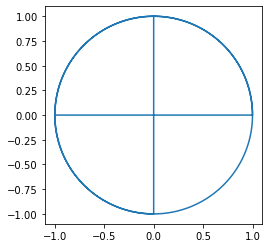

In [22]:
t = np.linspace(0, 3.5 * np.pi , num=300)
l = np.linspace(-1, 1, num=10)
z = np.zeros_like(l)
circle = np.array(
    [
        np.concatenate([l, np.cos(t), z]),
        np.concatenate([z, np.sin(t), l])
    ]
)

show_circle(circle) 

Luego, al utilizar `A` como un operador lineal, es decir $A C$.

In [23]:
print(A)

[[0.1 0.5]
 [0.4 0.8]]


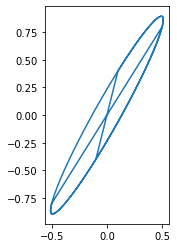

In [24]:
show_circle(A @ circle)

#### Ejercicio 2

(5 puntos)

* Obtén la descomposición SVD de $A$, tal que $A = U \Sigma V^H$.
* Grafica el resultado de aplicar los siguientes operadores lineales a la circunferencia unitaria:
    - $U$
    - $\Sigma$
    - $V^H$
* Explica con tus palabras la transformación de la circunferencia unitaria luego de aplicar los operadores anteriores, ¿Influye en algo que $U$ y $V$ sean unitarias?
* ¿Qué relación tienen los operadores anteriores respecto a aplicar el operador lineal $A$?

In [25]:
u, s, vh = svd(A)

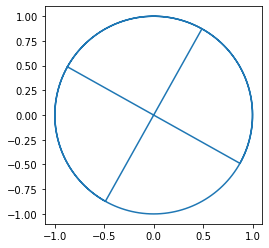

In [26]:
show_circle(u @ circle)

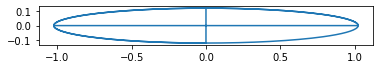

In [27]:
show_circle(np.diag(s) @ circle)

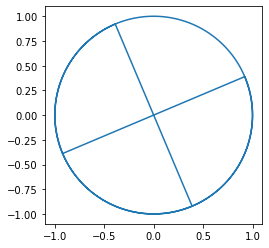

In [28]:
show_circle(vh @ circle)

__Respuesta:__ Son rotaciones de la circunferencia unitaria. Si influye, pues en caso contrario existiría contracción o dilatación de los ejes como en el caso 2

__Respuesta:__ Es una descomposición de las trasformaciones que se le realizan a la circunferencia unitaria

### Aproximación Rango Menor

Existen muchas maneras de expresar una matriz como una suma de matrices de menor rango, por ejemplo:

$$
\begin{bmatrix}
a & b \\
c & d 
\end{bmatrix}
= 
\begin{bmatrix}
a & 0 \\ 0 & 0  
\end{bmatrix}
+ 
\begin{bmatrix}
0 & b \\ 0 & 0 
\end{bmatrix}
+ 
\begin{bmatrix}
0 & 0 \\ c & 0 
\end{bmatrix}
+
\begin{bmatrix}
0 & 0 \\ 0 & d 
\end{bmatrix}.
$$

Cada una de las matrices del lado derecho pueden tener rango a lo más 1.

En el primer ejercicio demostraste que la descomposición SVD $A$ puede ser expresada como una suma de matrices. Sin embargo, cada una de estas matrices tiene rango 1! Esto pues cada una de estas matrices se forma a partir de los productos externos entre los vectores $u_l$ y $v_l$, es decir $u_l v_l^H$.

La pregunta natural es:

_¿Cómo obtener una buena aproximación de $A$ utilizando matrices de rango muy bajo?_

Bueno, aquí va un teorema.

__Teorema 1:__



Sea $A$ matriz de tamaño $m \times n$. Para cualquier $0 \le \ell \le r = \text{rank}(A)$, se define la matriz 
$$
A_\ell = \sum_{j=1}^{\ell} \sigma_j u_j v_j^*,
$$
utilizando los valores singulares $\sigma_j$ y los vectores singulares (izquierdos y derechos) $u_j, v_j$ de $A$,  i.e., $A_\ell$ se compone de la suma de los primeros $\ell$ términos de la descomposición SVD escrita como una suma de productor externos. Luego, el mínimo de  $\| A - B \|_F$ sobre todas las matrices $B$ de tamaño $m \times n$ y rango no mayor a $\ell$ se obtiene por $\| A - A_\ell \|_F$ y el mínimo que se alcanza es  $(\sigma_{\ell+1}^2 + \cdots + \sigma_r^2)^{1/2}$.

Recuerda que la norma de Frobenius se define como

$$
\| A \|_F = \bigg( \sum_{i, j} |A_{ij}|^2 \bigg)^{1/2}.
$$

Motivaremos el ejercicio utilizando imágenes en escala de grises ya que es muy intuitivo, fácil de ver y se puede considerar que la imagen es una matriz.

In [29]:
from pathlib import Path
from PIL import Image

In [30]:
# Utilizaremos una foto de una de mis gatitas c:
cat = Image.open(Path().resolve().parent / "images" / "coyoya.jpg").convert('L')
cat

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\judpi\\Desktop\\U\\Decimo semestre\\portfolio\\images\\coyoya.jpg'

Para convertirla en un numpy array basta con:

In [ ]:
cat_np = np.array(cat)
print(cat_np.shape)

#### Ejercicio 3

(10 puntos)

Define la función `low_rank_svd_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y un valor entero $\ell$ que represente la cantidad de términos a sumar de la despomposición SVD (respecto al teorema anterior).
* Retorne la aproximación $A_\ell$
* Imprima el error de la aproximación utilizando la norma de Frobenius.

Luego prueba tu función y observa la imagen con distintos valores de $\ell$.

In [ ]:
from scipy.linalg import norm
def low_rank_svd_approximation(A, l):
    
    #Se obtiene el tamaño de la matriz y se toma el mínimo
    row, col = A.shape
    minrc = min(row,col)
    
    #Se verifica que el parámetro l sea válido
    if l > minrc:
        print("El valor de la segunda entrada es inválido")
        return
    
    #Se obtiene la descomposición SVD
    u, s , vh = svd(A)
    
    #Se realiza la aproximación y se imprime el error en la norma de Frobenius
    Asvd = 0
    for i in range(l):
        Asvd += s[i]*u[:,i:i+1]*vh[i:i+1,:]
    print(norm(A-Asvd,'fro'))
    
    return Asvd

In [ ]:
cat10 = low_rank_svd_approximation(cat_np, l=10)
plt.imshow(cat10, cmap='gray');

In [ ]:
cat50 = low_rank_svd_approximation(cat_np, l=50)
plt.imshow(cat50, cmap='gray');

#### Ejercicio 4

(15 puntos)

En el ejercicio anterior fijaste un rango máximo y obtuviste la aproximación, sin embargo, en otro contexto, te gustaría fijar una tolerancia de error y obtener la mejor aproximación.

Define la función `low_rank_svd_tol_approximation` tal que:

* Los inputs sean $A$ (la imagen convertida un `np.array` de dimensión 2) y $\varepsilon$ (tolerancia relativa) tal que
$$
\left(\frac{\sigma_{\ell+1}^2 + \cdots + \sigma_r^2}{\sigma_1^2 + \cdots + \sigma_r^2}\right)^{1/2} \le \varepsilon.
$$
* Imprima $\ell(\varepsilon)$, es decir, el mayor rango aproximado de $A$ tal que el error de aproximación sea a lo más $\varepsilon$.
* Retorne la aproximación $A_{\ell(\varepsilon)}$

Luego prueba tu función y observa la imagen con distintos valores de $\varepsilon$.

In [ ]:
u, s , vh = svd(A)
s[0:2]**2
range(1,4+1)

In [ ]:
def low_rank_svd_tol_approximation(A, tol):
    
    # Se busca r
    row, col = A.shape
    r = min (row, col)
    
    # Se obtiene la descompsición SVD
    u, s , vh = svd(A)
    
    # Se busca el mayor rango aproximado
    for i in range(1,r+1):
        err = (s[i+1:r+1]**2).sum()/(s[0:r+1]**2).sum()
        if err <= tol:
            l = i
            print ("El mayor rango aproximado de A, con tolerancia " + str(tol) + " es " + str(l) )
            break
            
    # Se obtiene la aproximación de A
    Asvd = 0
    for i in range(l):
        Asvd += s[i]*u[:,i:i+1]*vh[i:i+1,:]
    return A

In [ ]:
cat_e1 = low_rank_svd_tol_approximation(cat_np, tol=1.e-1)
plt.imshow(cat_e1, cmap='gray');

In [ ]:
cat_e2 = low_rank_svd_tol_approximation(cat_np, tol=1.e-2)
plt.imshow(cat_e2, cmap='gray');

#### Ejercicio 5

(5 puntos)

Utilizando alguna imagen de tu preferencia utiliza ambas

In [ ]:
your_img_name = "im2.jpg"
your_img = Image.open(Path().resolve().parent / "images" / your_img_name ).convert('L')
your_img


In [ ]:
your_img_np = np.array(your_img)

In [ ]:
your_img10 = low_rank_svd_approximation(your_img_np, l=10)
plt.imshow(your_img10, cmap='gray');

In [ ]:
your_img50 = low_rank_svd_approximation(your_img_np, l=20)
plt.imshow(your_img50, cmap='gray');

In [ ]:
your_img_e1 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-1)
plt.imshow(your_img_e1, cmap='gray');

In [ ]:
your_img_e2 = low_rank_svd_tol_approximation(your_img_np, tol=1.e-2)
plt.imshow(your_img_e2, cmap='gray');

__Pregunta:__ ¿Será una manera útil de comprimir imágenes en el disco duro o crees que existen otras formas más eficientes?

__Respuesta:__ NO C XD

## COVID-19 en Chile

### *¿Cuál es el panorama actual de Chile frente a la pandemia de COVID-19?*

In [ ]:
import pandas as pd
from datetime import date

#### Ejercicio 6

(25 puntos)

Se ha hablado mucho últimamente que Magallanes es una región crítica en cuanto a casos confirmados de COVID-19. Este ejercicio busca constatar a través de los datos aquellas aseveraciones con un indicador simple pero que parece ser efectivo que bautizaremos como _tasa promedio de casos nuevos_, definida como el promedio de nuevos casos cada cien mil habitantes para un umbral de tiempo determinado.

Utiliza el dataframe `covid_comunas` para obtener el dataframe `covid_tasa_promedio_nuevos` que posee las columnas `region`, `comuna`, `promedio_casos_nuevos`, `poblacion` y `tasa_promedio_casos_nuevos` considerando el umbral de tiempo es entre el 1 y 11 de octubre del año 2020.

Para ello considera lo siguiente:

* No consideres registros que tengan código de comuna nulo.
* Rellena todos los registros de casos totales nulos por cero.
* Considera utilizar `melt` u otro método similar para apilar las columnas de fechas particulares en solo dos columnas, `fecha` y `casos_totales`.
* Define la columna `casos_nuevos` como la diferencia entre dos registros consecutivos para una misma comuna
    - No olvides ordenar por fecha
    - El primer registro de cada comuna debe ser nulo.
    - Considera utilizar el método `transform`.
* Filtra por el umbral de tiempo dado.
* Agrupa por región-comuna y luego define la columna `promedio_casos_nuevos` como el promedio de la columna `casos_nuevos`.
* En caso que hayas _dropeado_ la columna `poblacion` la puedes volver a agregar utilizando `merge` u otro método apropiado. Se asume que la población no cambia durante el tiempo.
* Asigna la columna `tasa_promedio_casos_nuevos` como la cantidad promedio de casos nuevos por cada cien mil habitantes.
* Ordena el dataframe resultante por `tasa_promedio_casos_nuevos` de manera descendente.

Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto1).

In [ ]:
covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_comunas.head()

In [ ]:
#esta va
start_date = pd.to_datetime("2020-10-1", format='%Y-%m-%d')
end_date = pd.to_datetime("2020-10-11", format='%Y-%m-%d')

In [ ]:
covid_tasa_promedio_nuevos = (
    
    #Se eliminan los registros con codigo de comuna nulo
    covid_comunas.loc[lambda x: x["codigo_comuna"].notnull()]
    
    #Se rellena con 0 las fechas que tienen como entrada 0 en algún registro
    .apply(lambda x: x.fillna(0) if x.name[0:4] == "2020" else x.values)
    
    #Se reduce el dataframe y se apila las columnas asociadas a las fechas en las columnas fecha y casos totales
    .melt( 
        id_vars=["region", "comuna", "poblacion"], 
        value_vars=covid_comunas.columns[5:66],
        var_name='fecha', 
        value_name='casos_totales')
    
    #Se transforman las fechas en string y se ordenan
    .astype({"fecha" : "datetime64[ns]"})
    .sort_values("fecha")
    
    #Se agrega la columna casos_nuevos con la información que la variable indica
    .assign(
        casos_nuevos= lambda df: df.groupby("comuna")["casos_totales"].transform(lambda x: x-x.shift())
    )
    
    #Se filtran las fechas
    .loc[lambda df: (df["fecha"] >= start_date) & (df["fecha"] <= end_date)] 
    
    #Se define la columna promedio casos nuevos
    .assign(
        promedio_casos_nuevos= lambda df: df.groupby(["comuna","region"])["casos_nuevos"].transform(lambda x: x.mean())
    )
    
    # Se define la columna promedio casos nuevos
    .assign(
        tasa_casos_nuevos= lambda df: df["promedio_casos_nuevos"]/df["poblacion"]*100000
    )
    
    #Se ordenan en orden desendiente de la tasa_casos_nuevos
    .sort_values("tasa_casos_nuevos",ascending=False)
    
    #Se reducen las filas innecesarias y las columnas innecesarias
    .drop_duplicates(subset=["comuna"])
    .drop(columns=["fecha","casos_nuevos","casos_totales"])
)

In [ ]:
covid_tasa_promedio_nuevos

__Pregunta:__ ¿Qué puedes observar respecto a las comunas que tienen mayor Tasa Promedio de Casos Nuevos?

__Respuesta:__ Son los que menor población tienen

#### Ejercicio 7

(15 puntos)

¿Hay correlación entre la cantidad de exámenes PCR y los casos confirmados en cada comuna?


Información del dataset: [aquí](https://github.com/MinCiencia/Datos-COVID19/tree/master/output/producto7).

In [ ]:
covid_pcr = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)
covid_pcr

Obtén el dataframe `covid_pcr_melt` utilizando `covid_pcr` tal que:

* Tenga las columnas `region`, `fecha` y `nm_pcr`.
* `fecha` sea del tipo `datetime64`.
* `nm_pcr` sea el número de PCR realizados y rellena los valores nulos por cero.

In [ ]:
covid_pcr_melt = (
    
    #Se definen las columnas fecha y nm_pcr manteniendo la columna región
    covid_pcr.melt( 
        id_vars=["region"], 
        value_vars=covid_pcr.columns[3:201],
        var_name='fecha', 
        value_name='nm_pcr')
    
    #Se cambia el tipo de los datos en la columna fecha
    .astype({"fecha" : "datetime64[ns]"})
    
    #Se rellena los valores nulos por cero en nm_pcr
    .apply(lambda x: x.fillna(0) if x.name == "nm_pcr" else x.values)
    
)

covid_pcr_melt

Obtén el dataframe `covid_casos_melt` utilizando `covid_casos` tal que:

* Tenga las columnas `region`, `fecha` y `casos_totales`.
* Rellena los valores nulos con cero.
* `fecha` sea del tipo `datetime64`.
* `casos_totales` sea la cantidad de casos totales por región y fecha.

In [ ]:
covid_casos_melt = (
    
    #Se crean las columnas fecha y casos_totales mantiendo la columna region
    covid_comunas.melt(id_vars=["region"], 
        value_vars=covid_comunas.columns[5:66],
        var_name='fecha', 
        value_name='casos_totales')
    
    #Se rellenan los valores nulos con 0 en la columna_casos _totales
    .apply(lambda x: x.fillna(0) if x.name == "casos_totales" else x.values)
    
    #Se redefine la columna columna casos_totales como los casos totales dada una fecha y región
    .assign(
        casos_totales= lambda df: df.groupby(["region","fecha"])["casos_totales"].transform(lambda x: x.sum())
    )
    
    #Se cambia el tipo de los datos de la columna fecha
    .astype({"fecha" : "datetime64[ns]"})
    
    #Se elimina la información sobrante 
    .drop_duplicates(subset=["region","fecha"])
)

covid_casos_melt

Finalmente, obtén la serie `covid_corr_casos_pcr` de la siguiente manera:

* Une `covid_pcr_melt` y `covid_casos_melt` a través de _merge_, utilizando la región y la fecha como llave, además conserva todos los registros (tanto derecha como izquierda).
* Rellena los números de PCR con el valor cero.
* Haz un `ffill` a los casos totales.
* Agrupa por región y obtén la correlación entre `nm_pcr` y `casos_totales`.
* Ordena los valores ascendentemente.

In [ ]:
covid_corr_casos_pcr = (
    
    #Se unen los registros
    covid_pcr_melt.merge(covid_casos_melt, how="outer", on=["region", "fecha"])
    
    #Se cambian los valores N.A. de la columna nm_pcr por 0
    .apply(lambda x: x.fillna(0) if x.name == "nm_pcr" else x.values)
    
    #Se aplica ffill a la columna casos_totales 
    .apply(lambda x: x.ffill() if x.name == "casos_totales" else x.values)
    
    #Se calculan las matrices de correlación por región
    .groupby("region")[["nm_pcr","casos_totales"]].apply(lambda grp: grp.corr())
    
    #Se elimina la información sobrante
    .loc[(slice(None),"nm_pcr"),"casos_totales"]
    .reset_index(level=1, drop=True)
    
    #Se ordena de manera ascendente
    .sort_values()
)

covid_corr_casos_pcr

__Pregunta:__ ¿Qué puedes inferir del análisis anterior? ¿Se condice con tu sentido común?

__Respuesta:__

#### Ejercicio 8

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)).

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__ Para cada comuna de la región metropolitana, comparar la curva de contagios confirmados con la curva de transacciones en el sistema bip. Considerando que es usual que los síntomas se manifiesten a los 6 o 7 días ¿Es coherente al contrastarlo con la información obtenida? 

__Respuesta:__

Primero importaremos la información que necesitamos

In [ ]:
trans_bip = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto41/BIPComuna_std.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)

covid_comunas = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)

display(covid_comunas.head(),
        trans_bip.head())

Para evitar problemas al cruzar los datos, estos los agruparemos por semanas utilizando las semanas epidemológicas definidas por el MINSAL disponibles en su repositorio GitHub.

In [ ]:
sem_epi = (
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/InformeEpidemiologico/SemanasEpidemiologicas.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .T
    .iloc[1:]
    .rename(columns={0: "Inicio", 1:"Final"})
    .astype({"Inicio" : "datetime64[ns]", "Final" : "datetime64[ns]" })
)

sem_epi.head()

Primero trabajaremos unicamente con el data frame covid_comunas, a este le aplicaremos los siguiente
1. Eliminaremos los valores con registro de comuna nulo y los valores fuera de la región metropolitana
2. Llenaremos los registros de valores nulos con cero para los casos por fechas
3. Eliminaremos los registros fuera de la región metropolitana
4. Aplicaremos la función melt para reducir las columnas de las fechas a 2 columnas, fechas y casos_totales
5. Cambiaremos el tipo de la fecha a datatime64 
6. Agruparemos por comuna para reorganizar la información a periodos semanales

Previo a esto definiremos una función que nos será de utilidad para el último paso

In [ ]:
#La función nos permitirá identificar a que semana epidemológica corresponde cada dato
def id_semana(x,sem_epi = sem_epi):
    for semana in sem_epi.T:
        if sem_epi["Inicio"][semana] <= x <= sem_epi["Final"][semana]:# >= x[indx]:
            return int(semana[2:])
    return None

In [ ]:
covid_stgo = (

    #Se eliminan los registros con codigo de comuna nulo
    covid_comunas.loc[lambda x: (x["codigo_comuna"].notnull()) & (x["region"]== "Metropolitana")]
    
    #Se rellena con 0 las fechas que tienen como entrada 0 en algún registro
    .apply(lambda x: x.fillna(0) if x.name[0:4] == "2020" else x.values)
    
    #Se reduce el dataframe y se apila las columnas asociadas a las fechas en las columnas fecha y casos totales
    .melt( 
        id_vars=["comuna", "poblacion"], 
        value_vars=covid_comunas.columns[5:66],
        var_name='fecha', 
        value_name='casos_totales')
    
    #Se transforman las fechas en string y se ordenan
    .astype({"fecha" : "datetime64[ns]"})
    .sort_values("fecha")
    
    #Se cambia el formato de la columna fecha
    .astype({"fecha" : "datetime64[ns]"})
    
    #Se agrega la columna casos_nuevos con la información que la variable indica
    .assign(
        casos_nuevos= lambda df: df.groupby("comuna")["casos_totales"].transform(lambda x: x-x.shift())
    )
    
    #Se define la columnas semana_epi y se agrupa la información casos_totales y casos_nuevos en torno a esta y comunas 
    .assign(
        semana_epi = lambda df: df["fecha"].apply(lambda x: id_semana(x)),
        casos_totales = lambda df: df.groupby(["comuna","semana_epi"])["casos_totales"].transform(lambda x: x.sum()),
        casos_nuevos = lambda df: df.groupby(["comuna","semana_epi"])["casos_nuevos"].transform(lambda x: x.sum())
    )
    
    #Se elimina la información restante
    .drop_duplicates(subset=["comuna","semana_epi"])
    .drop(columns=["fecha"])
    
)

covid_stgo.sort_values(["comuna","semana_epi"])#.get#.unique()#.get_group("Santiago")


Ahora exploraremos el data frame trans_bip


In [ ]:
display(trans_bip.info(), trans_bip["comuna"].unique())
ty_fecha =type(trans_bip["fecha"][0])
print (f"\n El formato de la columna fecha es, {ty_fecha}.")

Lo que haremos a continuación será lo siguiente
1. Cambiar el formato de la columna fecha 
2. Agrupar los datos por semana



In [ ]:
trans_covid = (
    
    #Se cambia el formato de la fecha
    trans_bip.astype({"fecha" : "datetime64[ns]"})
    
    #Se agrupa la información de las transacciones según las semanas epidemológica (info que se define en semana_epi)
    .assign(
        semana_epi = lambda df: df["fecha"].apply(lambda x: intento3(x)),
        transacciones = lambda df: df.groupby(["comuna","semana_epi"])["transacciones"].transform(lambda x: x.sum())
    )
    
    #Se elimina la información restante
    .drop_duplicates(subset=["comuna","semana_epi"])
    .drop(columns=["fecha","codigo_comuna"])
    
)

trans_covid.head()

Ahora exploraremos en que semanas podemos cruzar la información para eso
1. Uniremos los data frames trans_covid y covid_stgo con el método inner pues para relacionar la información necesitamos que la información esté disponible en ambos dataframes
2. Agruparemos por comuna para obtener un dataframe con la de las semanas donde la información está disponible

In [ ]:
ver_info_covid=(
    
    #Unir los data frames
    trans_covid.merge(covid_stgo, how="inner", on=["comuna", "semana_epi"])
    
    #Agrupar por comuna y obtener información
    .groupby("comuna")
    .agg(
        inicio=("semana_epi", "min"),
        fin=("semana_epi", "max")
        )
    )

display(ver_info_covid.head(),
    ver_info_covid.loc[ver_info_covid["inicio"]!=14],
    ver_info_covid.loc[ver_info_covid["fin"]!=20]
        )

Lo que nos dice que entre las semanas 14 y 20 podemos cruzar la información. Ahora encontraremos la cantidad de semanas entre el pick de transacciones y el pick de casos confirmados para eso
1. Uniremos los dataframes trans_covid y covid_stgo como lo habiamos hecho antes
2. Agruparemos por comuna y buscaremos el índice de los picks en cuestión para así encontrar la semana a la que corresponden

In [ ]:
dif_max_casos_confirmados=(
    trans_covid.merge(covid_stgo, how="inner", on=["comuna", "semana_epi"])
    .groupby("comuna")
    .apply(lambda df: df["semana_epi"][df["casos_totales"].idxmax()] - df["semana_epi"][df["transacciones"].idxmax()])
)

dif_max_casos_confirmados

Algunos datos de interes son

In [ ]:
display(dif_max_casos_confirmados.describe(),
dif_max_casos_confirmados.mode())

Por último haremos el mismo estudio, pero ahora para la región completa para eso el dataframe stgo_covid_trans de la sigueinte manera
1. Uniremos los dataframes trans_covid y covid_stgo como antes
2. Actualizaremos las columnas para obtener los totales regionales (recordemos que las comunas estan restringidas a donde funciona el transporte público mediante bip en santiago)

In [ ]:
stgo_covid_trans=(
    trans_covid.merge(covid_stgo, how="inner", on=["comuna", "semana_epi"])
    .assign(
        casos_totales = lambda df: df.groupby("semana_epi")["casos_totales"].transform(lambda x: x.sum()),
        casos_nuevos = lambda df: df.groupby("semana_epi")["casos_nuevos"].transform(lambda x: x.sum()),
        transacciones = lambda df: df.groupby("semana_epi")["transacciones"].transform(lambda x: x.sum()),
        poblacion = lambda df: df.groupby("semana_epi")["poblacion"].transform(lambda x: x.sum())
    )
    .drop_duplicates(subset=["semana_epi"])
    .drop(columns=["comuna"])
)
stgo_covid_trans

La diferencia entre el pick de transaccion y el pick de casos confirmados en la región de santiago es

In [ ]:
stgo_covid_trans["semana_epi"][stgo_covid_trans["casos_totales"].idxmax()] - stgo_covid_trans["semana_epi"][stgo_covid_trans["transacciones"].idxmax()]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.stats import multivariate_normal

%matplotlib inline

eje_y = stgo_covid_trans["transacciones"]#trans_covid.query("comuna=='Estación Central'")["transacciones"].values
eje_x = stgo_covid_trans["semana_epi"]#trans_covid.query("comuna=='Estación Central'")["semana_epi"].values

#eje_x1 = #covid_stgo.query("comuna=='Estacion Central'")["semana_epi"].values
eje_y1 = stgo_covid_trans["casos_nuevos"]#covid_stgo.query("comuna=='Estacion Central'")["casos_nuevos"].values

fig = plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(eje_x, eje_y, marker='o')
plt.subplot(1, 2, 2)
plt.plot(eje_x, eje_y1, marker='o')

Lo último es comentar lo pertinente del análisis. No se ha considerado un lapso de tiempo entre la cerificación de los contagios y el contagio real (el transporte público), por lo que el resultado de la ventana de una semana es solo coincidencia. Esto pues la ventana temporal de la información disponible para cruzar es muy acotada.

#### Ejercicio 9

(10 puntos)

Propón y responde una pregunta que puedas resolver analizando dos o más conjuntos de datos del repositorio oficial de datos COVID-19 del Ministerio de Ciencia, Tecnología e Innovación de Chile ([link](https://github.com/MinCiencia/Datos-COVID19)). Sin utilizar ninguno de los datasets que hayas utilizado en el ejercicio 8.

Se evaluará originalidad, análisis de datos, calidad de la pregunta y respuesta.

__Pregunta:__

Compare el número de defunciones por mes de los últimos 4 años y verifique que las muertes por covid oficiales son coherentes con el aumento de muertes en general 

__Respuesta:__

In [ ]:
def_17_20 = []
fecha_act = "2020-01-01_2020-10-29"
def_17_20.append(
pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/RegistroCivil/Defunciones/Defunciones_"+fecha_act+"_DO.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)

for i in range(2010,2020):
    def_17_20.append(
    pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/RegistroCivil/Defunciones/Defunciones_"+str(i)+"-01-01_"+str(i)+"-12-31_DO.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
)

def_tot = pd.concat(def_17_20)

def_tot

Para reducir la información a la necesaria haremos lo siguiente
1. Definiremos 2 nuevas columnas año y mes
2. Agruparemos por región y año y mes para calcular el número de defunciones totales y actualizaremos la columna defunciones con el total en este cada grupo 

In [ ]:
def_tot2 =(
    def_tot.assign(
        mes = lambda df: df["fecha"].apply(lambda x: int(x.split("-")[1])),
        año = lambda df: df["fecha"].apply(lambda x: int(x.split("-")[0]))
    )
    .assign(
        defunciones = lambda df: df.groupby(["region","año","mes"])["defunciones"].transform(lambda x: x.sum())
    )
    .drop_duplicates(subset=["region","mes","año"])
    .drop(columns=["fecha","comuna","codigo_comuna","codigo_region"])
    
    #.groupby("mes").agg(lambda x: x)
)
def_tot2.pivot(index=["año","mes"], columns = "region" , values = "defunciones")

In [ ]:
def_covid=(
pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto50/DefuncionesDEIS_confirmadosPorComuna.csv")
    .rename(columns=lambda x: x.lower().replace(" ", "_"))
    .drop(columns=["codigo_region","comuna","codigo_comuna","poblacion"])
    .apply(lambda x: x.fillna(0) if x.name[0:4] == "2020" else x.values)
)
def_covid.head()

In [ ]:
def_covid2=(
    def_covid
    .melt( 
        id_vars="region", 
        value_vars= def_covid.columns[1:],
        var_name='fecha', 
        value_name='defunciones')
    .assign(
        mes = lambda df: df["fecha"].apply(lambda x: int(x.split("-")[1])),
        año = 20202
    )
    .assign(
        defunciones = lambda df: df.groupby(["region","año","mes"])["defunciones"].transform(lambda x: x.sum())
    )
    .drop_duplicates(subset=["mes","region","año"])
    .drop(columns=["fecha"])
    #.groupby(["region", "año","mes"]).agg(lambda x: x)
   
)

def_covid2.pivot(index=["año","mes"], columns = "region" , values = "defunciones")

In [ ]:
#dif_def = (
#    def_tot2.groupby()
#)

#dif_def
#pd.concat([def_covid2,def_tot2],left_on="mes", axis=1)#.T#groupby("region")